Using Built-in Dataset

In [2]:
# ========================================
# Title: Predictive Analysis Using Random Forest
# Author: Mahesh Varma
# Internship: CodTech | Task - 2
# ========================================

# 📦 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [18]:
# 📂 2. Load Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

🔹 Shape of dataset: (150, 5)

🔹 Class Distribution:
 target
0    50
1    50
2    50
Name: count, dtype: int64

🔹 Dataset Description:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


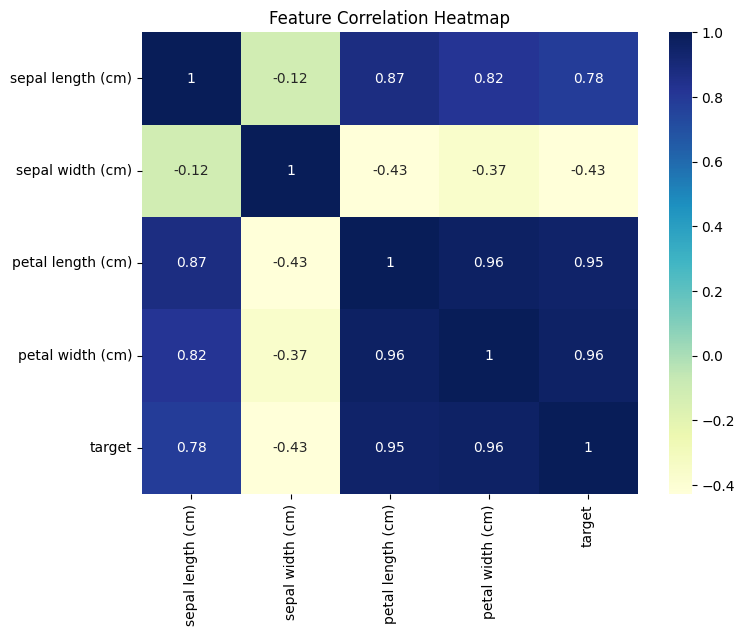

In [19]:
# 🔍 3. Exploratory Data Analysis (EDA)
def eda(df):
    print("🔹 Shape of dataset:", df.shape)
    print("\n🔹 Class Distribution:\n", df['target'].value_counts())
    print("\n🔹 Dataset Description:\n")
    display(df.describe())

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
    plt.title("Feature Correlation Heatmap")
    plt.show()

eda(df)

In [20]:
# 🎯 4. Feature Selection & Preprocessing
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# 🧪 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)



In [10]:
# 🤖 6. Model Initialization & Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# 🔍 7. Prediction & Evaluation
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))



📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

✅ Accuracy Score: 0.9211


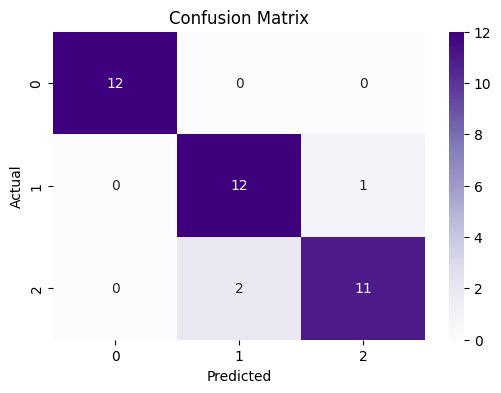

In [12]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



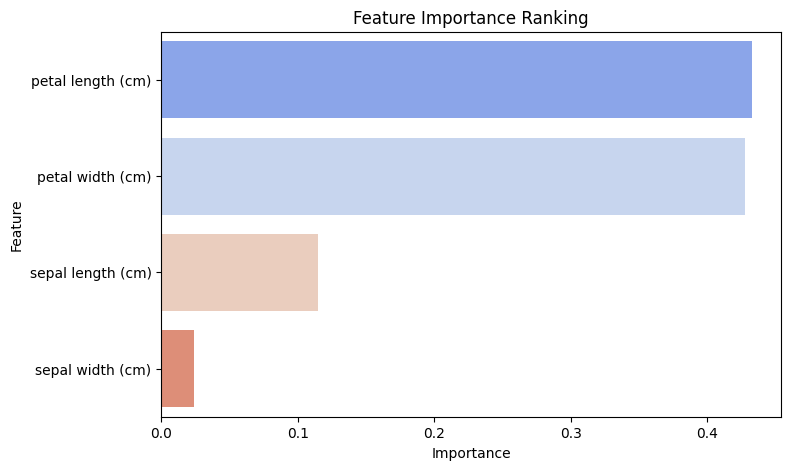

In [13]:
# 🌟 8. Feature Importance
importances = model.feature_importances_
features = iris.feature_names
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='coolwarm')
plt.title("Feature Importance Ranking")
plt.show()



In [14]:
# 🔁 9. Cross-Validation Accuracy
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"🔁 Cross-Validation Accuracy Scores: {cv_scores}")
print(f"📌 Mean CV Accuracy: {cv_scores.mean():.4f}")

🔁 Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
📌 Mean CV Accuracy: 0.9667
